In [130]:
import numpy as np
import scipy
import scipy.spatial
from scipy.spatial import distance_matrix

In [141]:
scattersEachGroup = 20

a1_x = np.random.uniform(9,12,scattersEachGroup)
a1_y = np.random.uniform(3,11,scattersEachGroup)
a2_x = np.random.uniform(1,6,scattersEachGroup)
a2_y = np.random.uniform(0,10,scattersEachGroup)
a3_x = np.random.uniform(5,9,scattersEachGroup)
a3_y = np.random.uniform(8,18,scattersEachGroup)

r4_x = np.random.uniform(0,12,scattersEachGroup)
r4_y = np.random.uniform(0,18,scattersEachGroup)

a_x = np.r_[a1_x, a2_x, a3_x, r4_x].reshape(-1,1)
a_y = np.r_[a1_y, a2_y, a3_y, r4_y].reshape(-1,1)

points = np.hstack((a_x, a_y))

In [142]:
scatters = scattersEachGroup * 4

indexes = np.arange(scatters)
np.random.shuffle(indexes)
indexes = indexes[:3]

distances = scipy.spatial.distance_matrix(points, points)

In [140]:
# for i in indexes:
#     print(i)
#     print(points[i])
#     print(points[i][0])
#     print(distances[i][i])
#     print(distances[i])

In [143]:
group_a = np.array([])
group_b = np.array([])
group_c = np.array([])

for i in range(scatters):
    if ((distances[indexes[0]][i] < distances[indexes[1]][i]) and (distances[indexes[0]][i] < distances[indexes[2]][i])):
        group_a = np.append(group_a, points[i])
    if ((distances[indexes[1]][i] < distances[indexes[0]][i]) and (distances[indexes[1]][i] < distances[indexes[2]][i])):
        group_b = np.append(group_b, points[i])
    if ((distances[indexes[2]][i] < distances[indexes[0]][i]) and (distances[indexes[2]][i] < distances[indexes[1]][i])):
        group_c = np.append(group_c, points[i])

In [144]:
group_a = group_a.reshape(-1, 2)
group_b = group_b.reshape(-1, 2)
group_c = group_c.reshape(-1, 2)

centres = np.r_[group_a.mean(0), group_b.mean(0), group_c.mean(0)].reshape(-1,2)

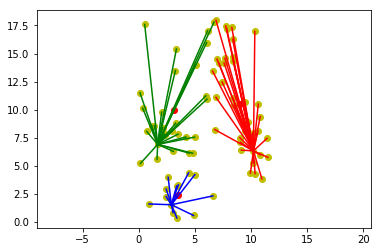

In [150]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(a_x, a_y, 'yo')
plt.plot(centres[:,0], centres[:,1], 'ro')

# plt.plot(np.r_[group_a[:,0], np.full(len(group_a), centres[0][0])].reshape(-1, len(group_a)),
#         np.r_[group_a[:,1], np.full(len(group_a), centres[0][1])].reshape(-1, len(group_a)),
#         'b-')
# plt.plot(np.r_[group_b[:,0], np.full(len(group_b), centres[1][0])].reshape(-1, len(group_b)),
#         np.r_[group_b[:,1], np.full(len(group_b), centres[1][1])].reshape(-1, len(group_b)),
#         'r-')
# plt.plot(np.r_[group_c[:,0], np.full(len(group_c), centres[2][0])].reshape(-1, len(group_c)),
#         np.r_[group_c[:,1], np.full(len(group_c), centres[2][1])].reshape(-1, len(group_c)),
#         'g-')

plt.plot(np.r_[group_a[:,0], np.full(len(group_a), points[indexes[0]][0])].reshape(-1, len(group_a)),
        np.r_[group_a[:,1], np.full(len(group_a), points[indexes[0]][1])].reshape(-1, len(group_a)),
        'b-')
plt.plot(np.r_[group_b[:,0], np.full(len(group_b), points[indexes[1]][0])].reshape(-1, len(group_b)),
        np.r_[group_b[:,1], np.full(len(group_b), points[indexes[1]][1])].reshape(-1, len(group_b)),
        'r-')
plt.plot(np.r_[group_c[:,0], np.full(len(group_c), points[indexes[2]][0])].reshape(-1, len(group_c)),
        np.r_[group_c[:,1], np.full(len(group_c), points[indexes[2]][1])].reshape(-1, len(group_c)),
        'g-')

plt.axis('equal')
plt.show()



# a1_x, a1_y